In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [144]:
from scipy import signal
import scipy
import numpy as np

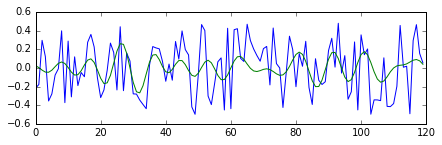

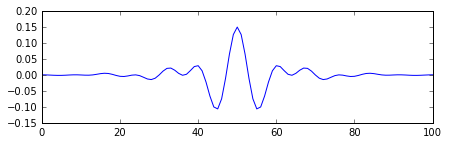

In [163]:
# filtering using FIR filter (finite impulse response) truncated in time
sg = np.random.rand(120)
sg = signal.detrend(sg) # linear detrend remove the dc component
figure(figsize(7,2))
plot(sg)
fir = signal.firwin(101, [0.10, 0.25], pass_zero=False) # band pass
y = signal.convolve(sg, fir, 'same') # first must be the larger array
plot(y)
figure(figsize(7,2))
plot(fir)

(0, 125)

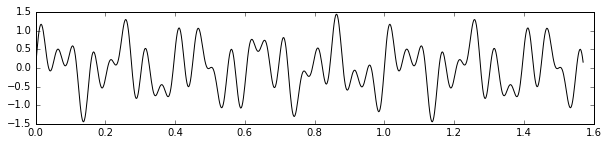

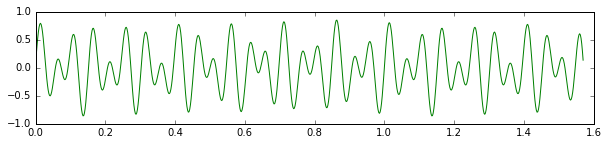

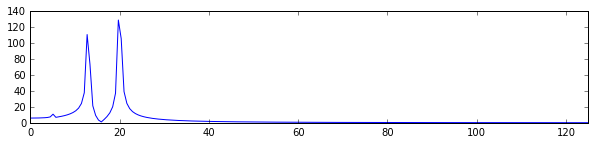

In [210]:
# filtering using a IIR (infinite impulse response) recursive filter
t = np.arange(0, 0.5*np.pi, 0.002)
sg = 0.5*np.sin(2*np.pi*13*t)+0.5*np.sin(2*np.pi*5*t)+0.5*np.sin(2*np.pi*20*t)
#sg = signal.detrend(sg) # linear detrend remove the dc component
figure(figsize(10,2))
plot(t, sg,'k-')
# just play with the order of the filter: the smaller the smaller the roll-of
# considering a sample rate of 2 ms nyquest would be 250 Hz
# than for a 10 Hz geophone it would behave like a high pass like bellow 10/250 = 0.04
b, a = signal.butter(2, 0.04, btype='highpass', analog=False)
sy = signal.filtfilt(b, a, sg) # filter twice forward and backward to garantee linear phase
figure(figsize(10,2))
plot(t, sy, 'g-')
figure(figsize(10,2))
fs = scipy.fftpack.fftfreq(len(sy), 0.002)
fsg = scipy.fftpack.fft(sy)
plot(fs[:len(sy)//2], abs(fsg[:len(sy)//2]))
xlim(0, 125)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


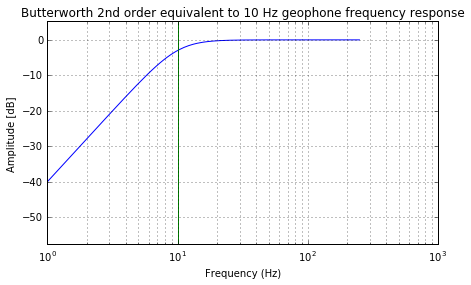

In [211]:
w, h = signal.freqz(b, a, whole=False)
#plt.plot(w, abs(h))
figure(figsize(7,4))
# if its 20*log() it would give -40 dB
plt.plot(500*w/(2*np.pi), 20*np.log10(abs(h))) # considering 2 ms sample rate = 1/T = 500 Hz
plt.title('Butterworth 2nd order equivalent to 10 Hz geophone frequency response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude [dB]')
#plt.ylim(-300, 20)
plt.xlim(1, 1000)
plt.xscale('log')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10., color='green') # cutoff frequency
plt.show()

sample rate and nyquist 0.0005 1000.0


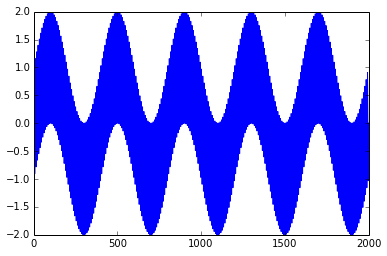

In [8]:
#First we create a one second signal that is the sum of two pure sine
#waves, with frequencies 5 Hz and 250 Hz, sampled at 2000 Hz.
t = np.linspace(0, 1.0, 2001)
xlow = np.sin(2 * np.pi * 5 * t)
xhigh = np.sin(2 * np.pi * 250 * t)
x = xlow + xhigh
plot(x)
dt = 1./2000 
fn = 1./(2*dt)
print "sample rate and nyquist", dt, fn

9.10861790128e-06


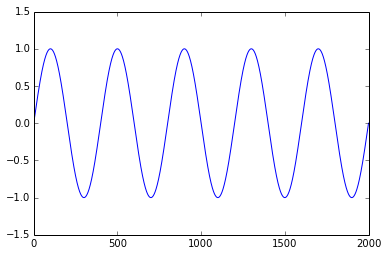

In [9]:
#Now create a lowpass Butterworth filter with a cutoff of 0.125 times
#the Nyquist rate, or 125 Hz, and apply it to x with filtfilt.  The
#result should be approximately xlow, with no phase shift.
from scipy import signal
b, a = signal.butter(8, 0.125)
y = signal.filtfilt(b, a, x, padlen=150)
print np.abs(y - xlow).max()
plot(y)

(-1.5, 1.5)

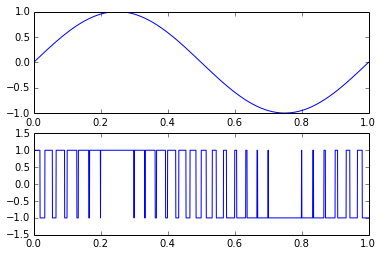

In [10]:
#A pulse-width modulated sine wave:
sig = np.sin(2 * np.pi * t)
pwm = signal.square(2 * np.pi * 30 * t, duty=(sig + 1)/2)
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.subplot(2, 1, 2)
plt.plot(t, pwm)
plt.ylim(-1.5, 1.5)

Resample the random signal considering it has a constante sample rate

assumes it is periodic and uses fourier to ressample it

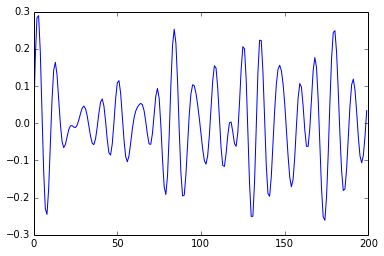

In [11]:
plot(sy)

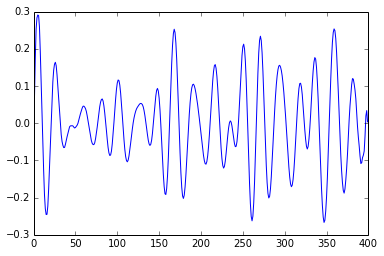

In [16]:
from scipy import signal

plot(signal.resample(sy, len(sy)*2))

## Spectral inversion to create an inverse filter (FIR) ##

<b>
The Scientist and Engineer's Guide to
Digital Signal Processing <br>
Steven W. Smith 1997 - pg 272 <br> 
</b>

### Create a lowpass filter from a highpass ###

For this random signal sample rate = 1. so nyquest=0.5



In [212]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### High Pass ###

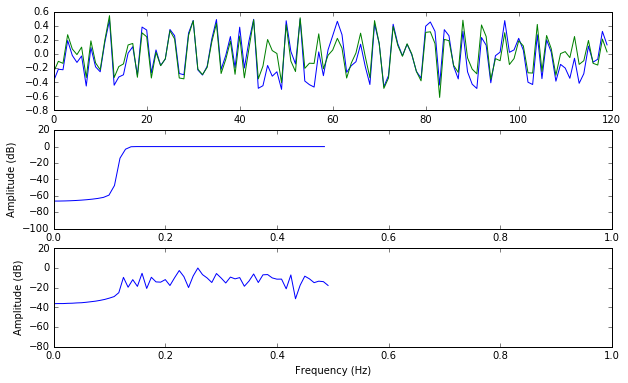

In [216]:
import scipy
from scipy import signal
import numpy as np

# nf must be odd!
nf = 101 # more points = more sharp = higher rol-off db/octave
ns = 120

# filtering using FIR filter (finite impulse response) truncated in time
sg = np.random.rand(ns)
sg = signal.detrend(sg) # linear detrend remove the dc component
#signal.
sg = (sg - min(sg))/(max(sg)-min(sg)) - 0.5


fir = signal.firwin(nf, 0.25, pass_zero=False) # high pass 0.25 of nyquest
y = signal.convolve(sg, fir, 'same') # first must be the larger array

pylab.figure(figsize=(10,6))
ax = pylab.subplot(311)
ax.plot(sg)
ax.plot(y)

fsg = scipy.fftpack.fftfreq(ns)
Fsg = np.abs(scipy.fftpack.fft(y))
Fsg = 20*np.log10(Fsg/max(Fsg))

fsfir = scipy.fftpack.fftfreq(nf)
Ffir = np.abs(scipy.fftpack.fft(fir))
Ffir = 20*np.log10(Ffir/max(Ffir))

ax = pylab.subplot(312)
ax.plot(fsfir[:(nf//2)], Ffir[:(nf//2)])
pylab.xlim(0, 1)
pylab.ylim(-100, 20.)
pylab.ylabel('Amplitude (dB)') # 

ax = pylab.subplot(313)
ax.plot(fsg[:(ns//2)], Fsg[:(ns//2)])
pylab.xlim(0, 1)
pylab.ylim(-80, 20.)
pylab.xlabel('Frequency (Hz)')
pylab.ylabel('Amplitude (dB)') # 
pylab.show()

### Inverted Filter : <br> Low Pass ###

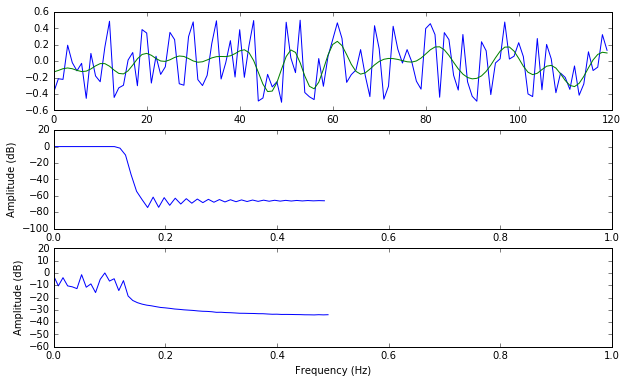

In [219]:
# Spectral Inversion 
invfir = -fir[:] # change signal all samples
invfir[(nf//2)] += 1. # add one to the simetry center

y = signal.convolve(sg, invfir, 'same') # first must be the larger array

pylab.figure(figsize=(10,6))
ax = pylab.subplot(311)
ax.plot(sg)
ax.plot(y)

fsg = scipy.fftpack.fftfreq(ns)
Fsg = np.abs(scipy.fftpack.fft(y))
Fsg = 20*np.log10(Fsg/max(Fsg))

fsfir = scipy.fftpack.fftfreq(nf)
Ffir = np.abs(scipy.fftpack.fft(invfir))
Ffir = 20*np.log10(Ffir/max(Ffir))

ax = pylab.subplot(312)
ax.plot(fsfir[:(nf//2)], Ffir[:(nf//2)])
pylab.xlim(0, 1)
pylab.ylim(-100, 20.)
pylab.ylabel('Amplitude (dB)')

ax = pylab.subplot(313)
ax.plot(fsg[:(ns//2)], Fsg[:(ns//2)])
pylab.xlim(0, 1)
pylab.ylim(-60, 20.)
pylab.xlabel('Frequency (Hz)')
pylab.ylabel('Amplitude (dB)') # 
pylab.show()
